# Integration K-means and Simulated Annealling for PathFinding

**1. Import Dataset**

In [76]:
import pandas as pd

In [77]:
pd.set_option('display.max_colwidth',500)
Data1 = pd.read_excel('Datalokasi1.xlsx')
Data1


,No,Warehouse,Koordinat,X,y
0,0,1A,B0,8.1,6.923077
1,2,2M,F2,40.5,25.384615
2,3,1B,E0,8.1,20.769231
3,4,1D,G0,8.1,30.000000
4,8,2M,A2,40.5,2.307692
5,11,1A,D0,8.1,16.153846
6,12,1A,A0,8.1,2.307692
7,16,2M,B2,40.5,6.923077
8,18,1A,B1,24.3,6.923077
9,26,1L,A1,24.3,2.307692


In [78]:
Data=Data1.loc[:,['No','X','y']]
Data

,No,X,y
0,0,8.1,6.923077
1,2,40.5,25.384615
2,3,8.1,20.769231
3,4,8.1,30.000000
4,8,40.5,2.307692
5,11,8.1,16.153846
6,12,8.1,2.307692
7,16,40.5,6.923077
8,18,24.3,6.923077
9,26,24.3,2.307692


In [79]:
Data_pro=Data.iloc[:,1:3]
Dataraw = pd.DataFrame(Data_pro)
Dataraw

,X,y
0,8.1,6.923077
1,40.5,25.384615
2,8.1,20.769231
3,8.1,30.000000
4,40.5,2.307692
5,8.1,16.153846
6,8.1,2.307692
7,40.5,6.923077
8,24.3,6.923077
9,24.3,2.307692


**Visualization of Location in Warehouse**

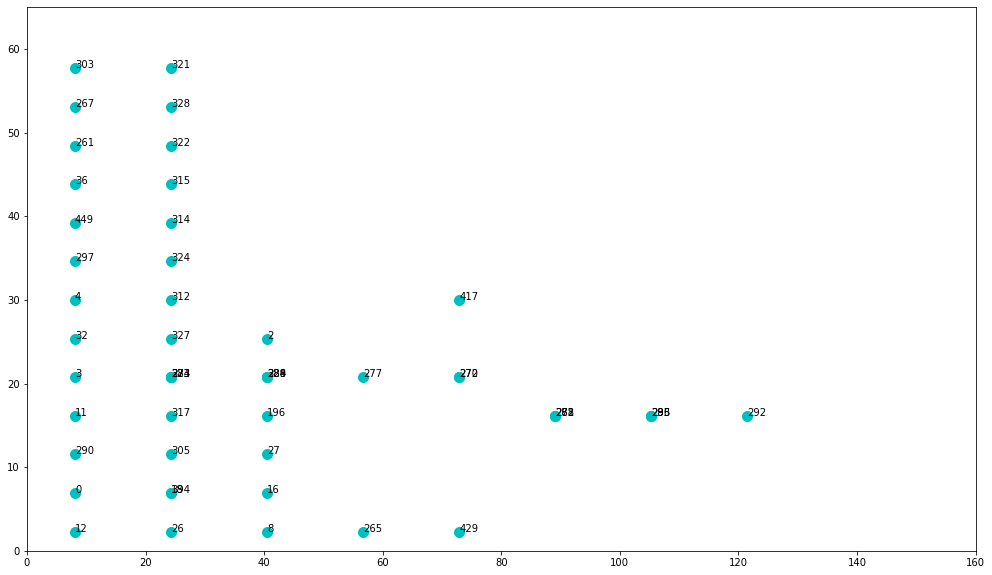

In [80]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10

X = Data['X']
Y = Data['y']
N = Data ['No']

ax = plt.subplot()
ax.scatter(X,Y,s=100,c='c', marker='o', )

plt.xlim(0,160)
plt.ylim (0, 65)

for i, txt in enumerate(N):
    ax.annotate(txt, (X[i], Y[i]))
    
plt.show()

**Scaling Dataset**

In [81]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
array = np.array(Dataraw)
array


array([[  8.1       ,   6.92307692],
       [ 40.5       ,  25.38461538],
       [  8.1       ,  20.76923077],
       [  8.1       ,  30.        ],
       [ 40.5       ,   2.30769231],
       [  8.1       ,  16.15384615],
       [  8.1       ,   2.30769231],
       [ 40.5       ,   6.92307692],
       [ 24.3       ,   6.92307692],
       [ 24.3       ,   2.30769231],
       [ 40.5       ,  11.53846154],
       [  8.1       ,  25.38461538],
       [  8.1       ,  43.84615385],
       [ 40.5       ,  16.15384615],
       [  8.1       ,  48.46153846],
       [ 56.7       ,   2.30769231],
       [  8.1       ,  53.07692308],
       [ 89.1       ,  16.15384615],
       [ 72.9       ,  20.76923077],
       [ 89.1       ,  16.15384615],
       [ 72.9       ,  20.76923077],
       [ 24.3       ,  20.76923077],
       [ 24.3       ,  20.76923077],
       [ 56.7       ,  20.76923077],
       [ 89.1       ,  16.15384615],
       [ 24.3       ,  20.76923077],
       [ 40.5       ,  20.76923077],
 

In [82]:
scaler = MinMaxScaler()
Data_scal = scaler.fit_transform(array)
Data_scal

array([[0.        , 0.08333333],
       [0.28571429, 0.41666667],
       [0.        , 0.33333333],
       [0.        , 0.5       ],
       [0.28571429, 0.        ],
       [0.        , 0.25      ],
       [0.        , 0.        ],
       [0.28571429, 0.08333333],
       [0.14285714, 0.08333333],
       [0.14285714, 0.        ],
       [0.28571429, 0.16666667],
       [0.        , 0.41666667],
       [0.        , 0.75      ],
       [0.28571429, 0.25      ],
       [0.        , 0.83333333],
       [0.42857143, 0.        ],
       [0.        , 0.91666667],
       [0.71428571, 0.25      ],
       [0.57142857, 0.33333333],
       [0.71428571, 0.25      ],
       [0.57142857, 0.33333333],
       [0.14285714, 0.33333333],
       [0.14285714, 0.33333333],
       [0.42857143, 0.33333333],
       [0.71428571, 0.25      ],
       [0.14285714, 0.33333333],
       [0.28571429, 0.33333333],
       [0.85714286, 0.25      ],
       [0.28571429, 0.33333333],
       [0.        , 0.16666667],
       [1.

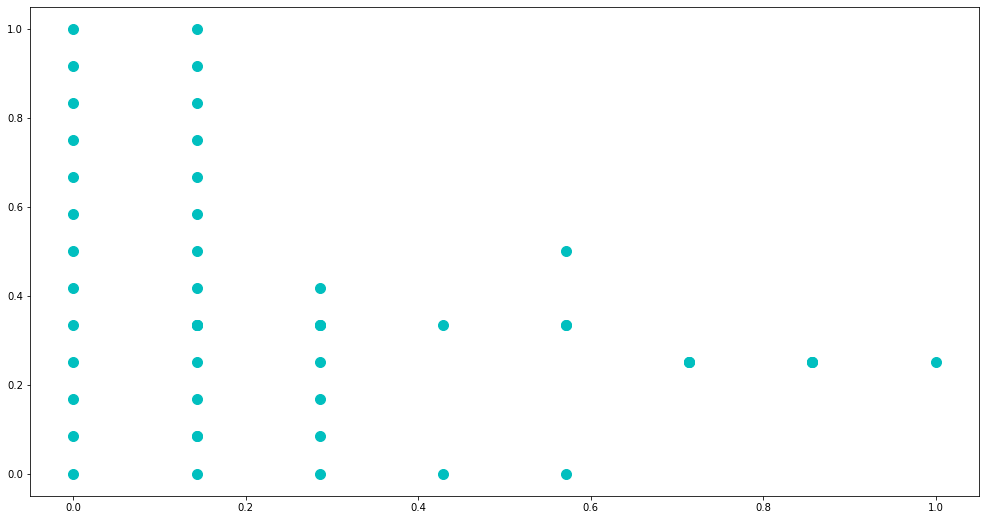

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 9

output = plt.scatter(Data_scal[:,0], Data_scal[:,1], s = 100, c = 'c', marker = "o", alpha = 1, )


**K-Means Analysis**

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


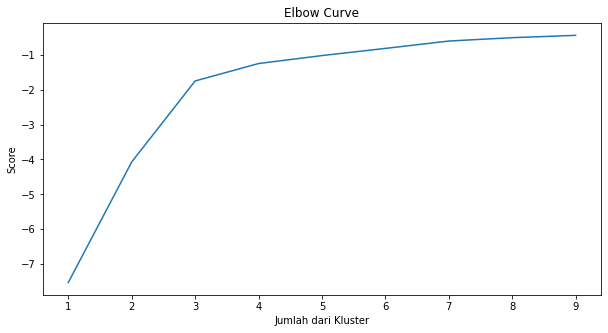

In [84]:
from sklearn.cluster import KMeans
Kluster = range(1,10)
kmeans = [KMeans(n_clusters=i)for i in Kluster]
Hasil = [kmeans[i].fit(Data_scal).score(Data_scal) for i in range(len(kmeans))]

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
plt.plot(Kluster,Hasil)
plt.xlabel('Jumlah dari Kluster')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [85]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Data_scal)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(Data_scal, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.424026094583501
For n_clusters=3, the silhouette score is 0.5173187005362724
For n_clusters=4, the silhouette score is 0.44934545934449893
For n_clusters=5, the silhouette score is 0.4291364494214988
For n_clusters=6, the silhouette score is 0.42989695396387284
For n_clusters=7, the silhouette score is 0.4355268648898376
For n_clusters=8, the silhouette score is 0.43629976090454137
For n_clusters=9, the silhouette score is 0.4014363068058979
For n_clusters=10, the silhouette score is 0.3970794317687362


In [86]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(Data_scal) # Compute k-means clustering.
Data['cluster_label'] = kmeans.fit_predict(Data_scal)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Data_scal) # Labels of each point
Data

,No,X,y,cluster_label
0,0,8.1,6.923077,1
1,2,40.5,25.384615,1
2,3,8.1,20.769231,1
3,4,8.1,30.000000,0
4,8,40.5,2.307692,1
5,11,8.1,16.153846,1
6,12,8.1,2.307692,1
7,16,40.5,6.923077,1
8,18,24.3,6.923077,1
9,26,24.3,2.307692,1


In [87]:
center = pd.DataFrame (kmeans.cluster_centers_)
center.columns = ['x','y']
center

,x,y
0,0.071429,0.750000
1,0.175824,0.224359
2,0.727273,0.265152


In [88]:
Vis = pd.DataFrame(Data_scal)
Vis.columns = ['X','Y']
Vis
No = Data['No']
Data_viz = pd.concat([No,Vis],axis =1)
Data_viz

,No,X,Y
0,0,0.000000,0.083333
1,2,0.285714,0.416667
2,3,0.000000,0.333333
3,4,0.000000,0.500000
4,8,0.285714,0.000000
5,11,0.000000,0.250000
6,12,0.000000,0.000000
7,16,0.285714,0.083333
8,18,0.142857,0.083333
9,26,0.142857,0.000000


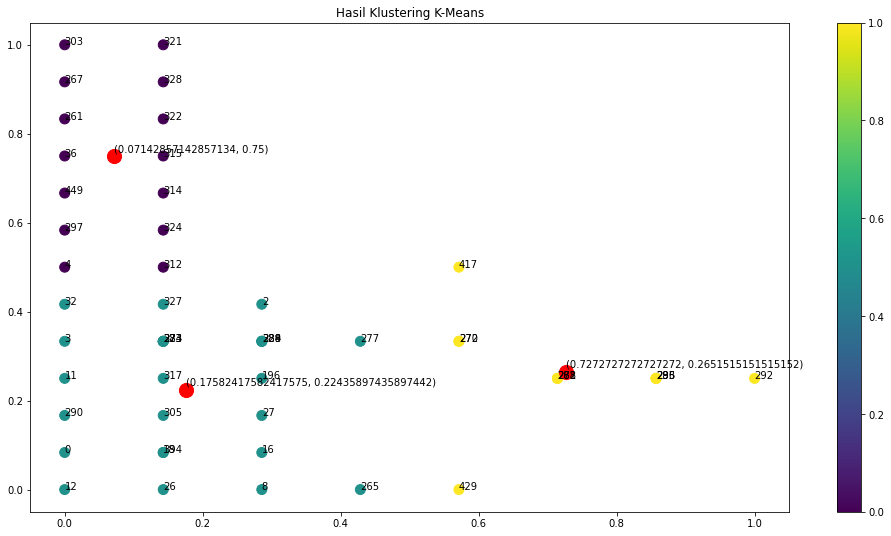

In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 9

Xc = Data_viz['X']
yc = Data_viz ['Y']
nc = Data_viz ['No']

colors = {'0':'red', '1':'blue', '2':'yellow'}
axt = plt.subplot()
axt.scatter(Xc, yc, s = 100, c = Data.cluster_label, marker = "o", alpha = 1, )
for i, txt in enumerate(nc):
    axt.annotate(txt, (Xc[i], yc[i]))

    
x_cen = center['x']
y_cen = center['y']

plt.scatter(x_cen, y_cen , c='red', s=200, alpha=1 , marker="o")

for i, j in zip(x_cen, y_cen):
   plt.text(i, j+0.01, '({}, {})'.format(i, j))

plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

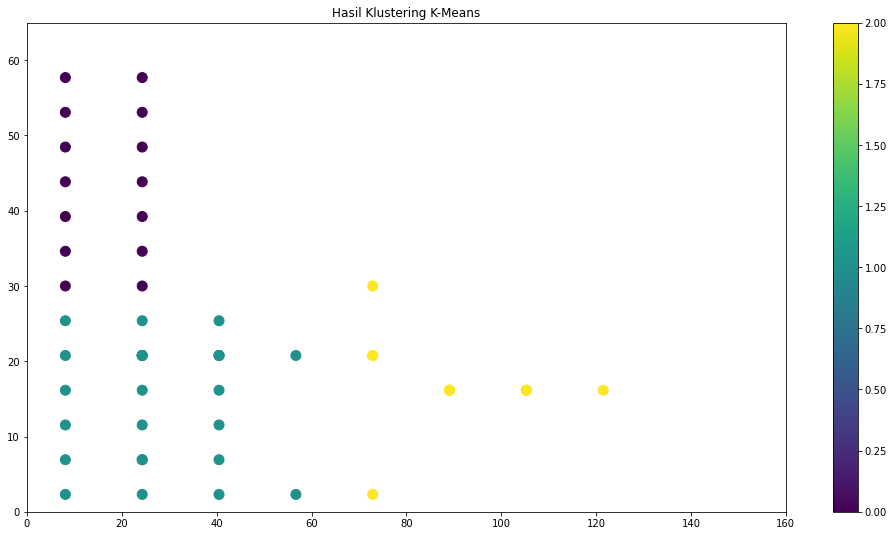

In [90]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 9
colors = {'0':'red', '1':'blue', '2':'yellow'}
output = plt.scatter(Data.X, Data.y, s = 100, c = Data.cluster_label, marker = "o", alpha = 1, )
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.xlim(0,160)
plt.ylim (0, 65)
plt.show()

In [93]:
Data1 = Data.copy()
Data2 = Data.copy()
Data3 = Data.copy()

**Coordinat in Clustering 0 or Batch1**


In [97]:
Data1.drop(Data1.loc[Data1['cluster_label']==1].index, inplace=True)
Data1.drop(Data1.loc[Data1['cluster_label']==2].index, inplace=True)
Batch1 = Data1
Batch1


,No,X,y,cluster_label
3,4,8.1,30.000000,0
12,36,8.1,43.846154,0
14,261,8.1,48.461538,0
16,267,8.1,53.076923,0
33,297,8.1,34.615385,0
34,303,8.1,57.692308,0
36,312,24.3,30.000000,0
37,314,24.3,39.230769,0
38,315,24.3,43.846154,0
40,321,24.3,57.692308,0


<ipython-input-107-c32139926607>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_b1 = plt.subplot()


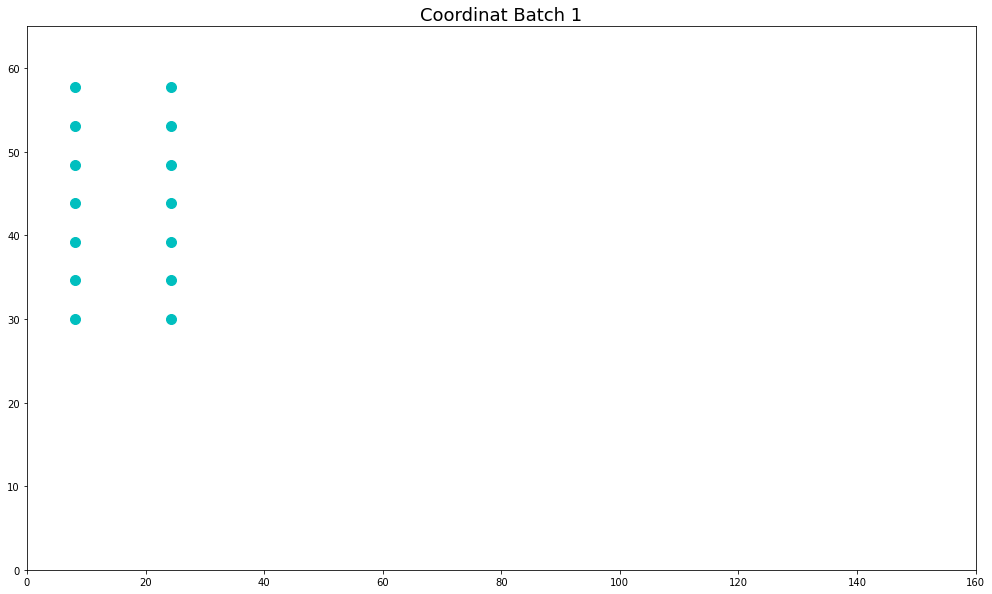

In [107]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
plt.title("Coordinat Batch 1", size = 18)

X = Batch1['X']
Y = Batch1['y']
N = Batch1['No']

ax_b1 = plt.subplot()
ax_b1.scatter(X,Y,s=100,c='c', marker='o', )

plt.xlim(0,160)
plt.ylim (0, 65)
    
plt.show()

**Shortest path in Bath 1 using Simulted Annealing**

In [99]:
SA =Batch1.iloc [:,1:3]
array =np.array(SA)
array

array([[ 8.1       , 30.        ],
       [ 8.1       , 43.84615385],
       [ 8.1       , 48.46153846],
       [ 8.1       , 53.07692308],
       [ 8.1       , 34.61538462],
       [ 8.1       , 57.69230769],
       [24.3       , 30.        ],
       [24.3       , 39.23076923],
       [24.3       , 43.84615385],
       [24.3       , 57.69230769],
       [24.3       , 48.46153846],
       [24.3       , 34.61538462],
       [24.3       , 53.07692308],
       [ 8.1       , 39.23076923]])

In [100]:
def distance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
def totaldistancetour (tour):
    d=0
    for i in range(1, len (tour)):
        x1 = array[tour[i-1]][0]
        y1 = array[tour[i-1]][1]
        x2 = array [tour][i][0]
        y2 = array [tour][i][1]
        d = d+distance (x1, y1, x2, y2)
    x1 = array [tour[len(tour)-1]][0]
    y1 = array [tour[len(tour)-1]][1]
    x2 = array [tour[0]][0]
    y2 = array [tour[0]][1]
    d = d+distance (x1, y1, x2, y2)
    return d

In [101]:
n = len (array)
n

14

In [102]:
import random
import copy
import math
tour = random.sample(range(n),n)
tour

[2, 0, 8, 3, 7, 1, 9, 13, 11, 6, 5, 10, 12, 4]

In [103]:
for temperature in np.logspace(0,5, num=1000)[::-1]:
    oldDistance=totaldistancetour(tour)
    [i,j]=sorted (random.sample(range(n),2))
    newTour = tour[:i] + tour [j:j+1] + tour [i+1:j] + tour [i:i+1]+ tour[j+1:]
    newDistance = totaldistancetour(newTour)
    if math.exp((oldDistance-newDistance)/temperature)>random.random():
        tour = copy.copy(newTour)
        #print (newTour,newDistance)
print ("Tour terbaik yakni",tour)
print ("jarak terbaik adalah",totaldistancetour(tour))

Tour terbaik yakni [8, 12, 9, 5, 3, 2, 7, 11, 6, 0, 4, 13, 1, 10]
jarak terbaik adalah 118.65916417033374


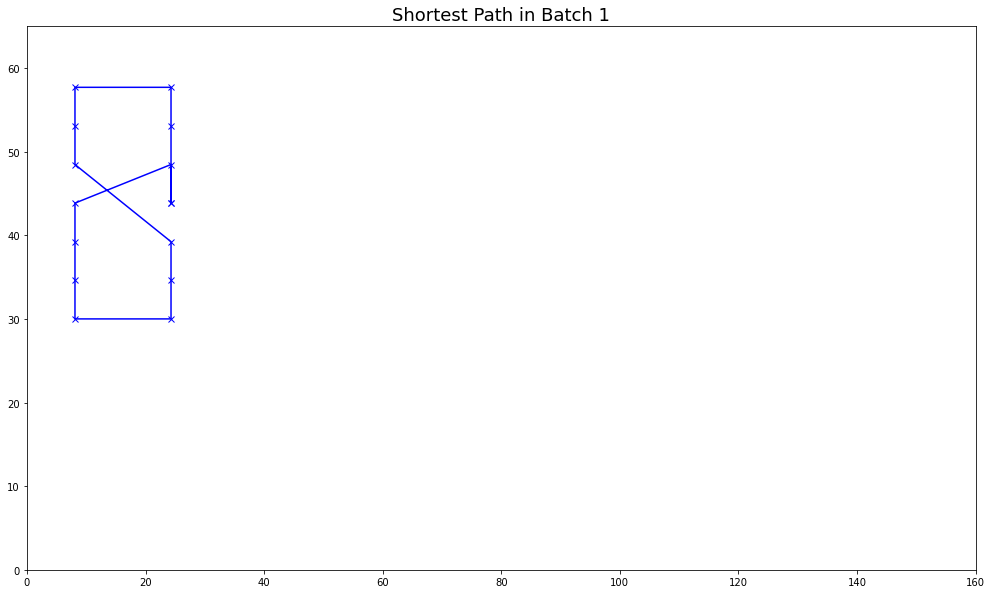

In [108]:
import matplotlib.pyplot as plt
plt.title("Shortest Path in Batch 1", size = 18)

plt.plot([array[tour[i%n]][0] for i in range (n+1) ], 
        [array[tour[i%n]][1] for i in range(n+1)],'xb-')

plt.xlim(0,160)
plt.ylim (0, 65)
plt.show()

**Coordinat in Clustering 1 or Bath2**

In [105]:
Data2.drop(Data2.loc[Data2['cluster_label']==0].index, inplace=True)
Data2.drop(Data2.loc[Data2['cluster_label']==2].index, inplace=True)
Batch2 = Data2
Batch2


,No,X,y,cluster_label
0,0,8.1,6.923077,1
1,2,40.5,25.384615,1
2,3,8.1,20.769231,1
4,8,40.5,2.307692,1
5,11,8.1,16.153846,1
6,12,8.1,2.307692,1
7,16,40.5,6.923077,1
8,18,24.3,6.923077,1
9,26,24.3,2.307692,1
10,27,40.5,11.538462,1


<ipython-input-109-f917d992ff97>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_b1 = plt.subplot()


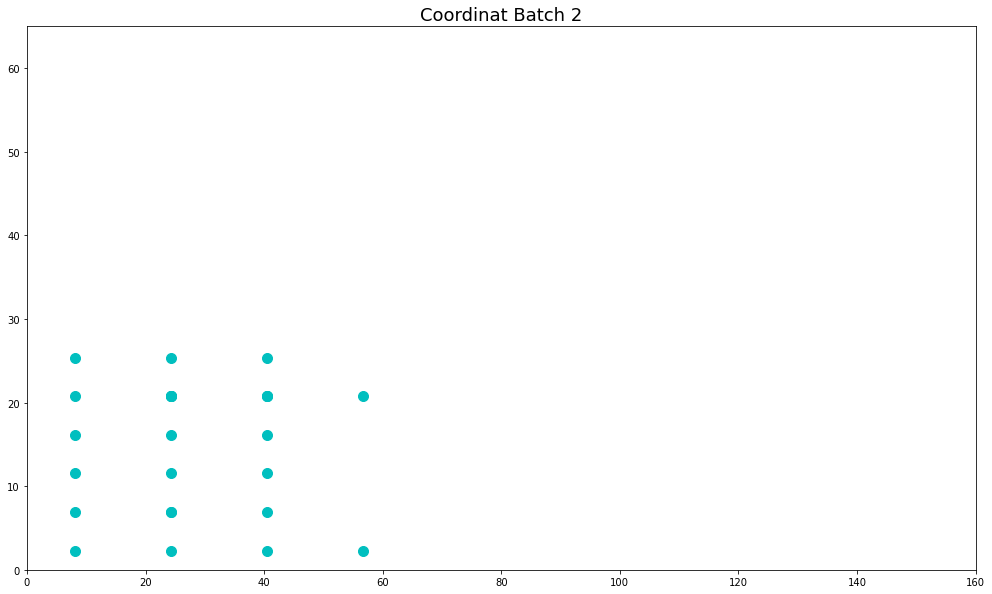

In [109]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
plt.title("Coordinat Batch 2", size = 18)

X = Batch2['X']
Y = Batch2['y']
N = Batch2['No']

ax_b1 = plt.subplot()
ax_b1.scatter(X,Y,s=100,c='c', marker='o', )

plt.xlim(0,160)
plt.ylim (0, 65)
    
plt.show()

In [111]:
SA =Batch2.iloc [:,1:3]
array =np.array(SA)
array

array([[ 8.1       ,  6.92307692],
       [40.5       , 25.38461538],
       [ 8.1       , 20.76923077],
       [40.5       ,  2.30769231],
       [ 8.1       , 16.15384615],
       [ 8.1       ,  2.30769231],
       [40.5       ,  6.92307692],
       [24.3       ,  6.92307692],
       [24.3       ,  2.30769231],
       [40.5       , 11.53846154],
       [ 8.1       , 25.38461538],
       [40.5       , 16.15384615],
       [56.7       ,  2.30769231],
       [24.3       , 20.76923077],
       [24.3       , 20.76923077],
       [56.7       , 20.76923077],
       [24.3       , 20.76923077],
       [40.5       , 20.76923077],
       [40.5       , 20.76923077],
       [ 8.1       , 11.53846154],
       [24.3       , 11.53846154],
       [24.3       , 16.15384615],
       [24.3       , 20.76923077],
       [24.3       , 25.38461538],
       [40.5       , 20.76923077],
       [24.3       ,  6.92307692]])

In [112]:
def distance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def totaldistancetour (tour):
    d=0
    for i in range(1, len (tour)):
        x1 = array[tour[i-1]][0]
        y1 = array[tour[i-1]][1]
        x2 = array [tour][i][0]
        y2 = array [tour][i][1]
        d = d+distance (x1, y1, x2, y2)
    x1 = array [tour[len(tour)-1]][0]
    y1 = array [tour[len(tour)-1]][1]
    x2 = array [tour[0]][0]
    y2 = array [tour[0]][1]
    d = d+distance (x1, y1, x2, y2)
    return d

In [113]:
n = len (array)
n

26

In [114]:
import random
import copy
import math
tour = random.sample(range(n),n)
tour

[11,
 23,
 21,
 10,
 9,
 22,
 6,
 24,
 16,
 19,
 13,
 17,
 15,
 14,
 1,
 18,
 5,
 2,
 8,
 3,
 20,
 25,
 12,
 7,
 0,
 4]

In [115]:
for temperature in np.logspace(0,5, num=1000)[::-1]:
    oldDistance=totaldistancetour(tour)
    [i,j]=sorted (random.sample(range(n),2))
    newTour = tour[:i] + tour [j:j+1] + tour [i+1:j] + tour [i:i+1]+ tour[j+1:]
    newDistance = totaldistancetour(newTour)
    if math.exp((oldDistance-newDistance)/temperature)>random.random():
        tour = copy.copy(newTour)
        #print (newTour,newDistance)
print ("Tour terbaik yakni",tour)
print ("jarak terbaik adalah",totaldistancetour(tour))

Tour terbaik yakni [19, 5, 7, 12, 15, 18, 22, 23, 1, 17, 24, 3, 21, 16, 10, 2, 8, 25, 20, 14, 13, 9, 6, 11, 0, 4]
jarak terbaik adalah 323.9926119002428


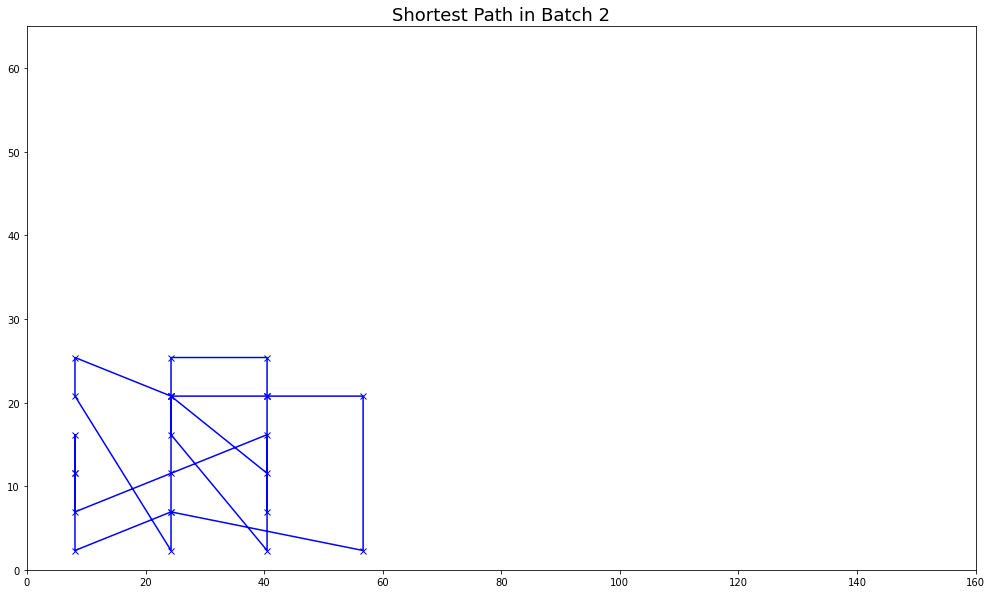

In [116]:
import matplotlib.pyplot as plt
plt.title("Shortest Path in Batch 2", size = 18)

plt.plot([array[tour[i%n]][0] for i in range (n+1) ], 
        [array[tour[i%n]][1] for i in range(n+1)],'xb-')

plt.xlim(0,160)
plt.ylim (0, 65)
plt.show()

**Coordinat in Cluster 2 or Batch 3**

In [117]:
Data3.drop(Data3.loc[Data3['cluster_label']==0].index, inplace=True)
Data3.drop(Data3.loc[Data3['cluster_label']==1].index, inplace=True)
Batch3 = Data3
Batch3

,No,X,y,cluster_label
17,268,89.1,16.153846,2
18,270,72.9,20.769231,2
19,271,89.1,16.153846,2
20,272,72.9,20.769231,2
24,282,89.1,16.153846,2
27,285,105.3,16.153846,2
30,292,121.5,16.153846,2
31,293,105.3,16.153846,2
32,296,105.3,16.153846,2
48,417,72.9,30.000000,2


<ipython-input-118-d137bf1b9771>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_b1 = plt.subplot()


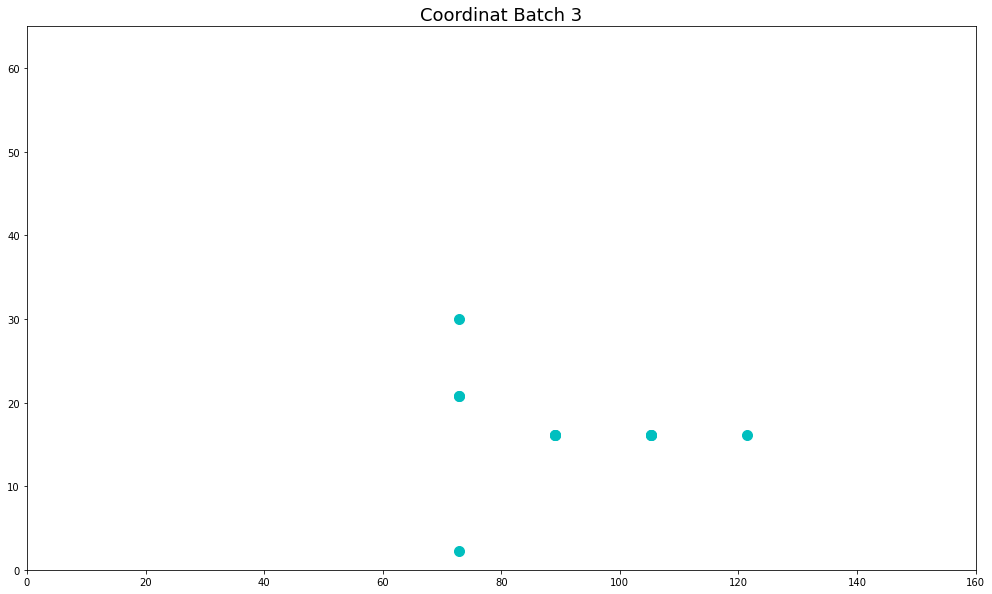

In [118]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
plt.title("Coordinat Batch 3", size = 18)

X = Batch3['X']
Y = Batch3['y']
N = Batch3['No']

ax_b1 = plt.subplot()
ax_b1.scatter(X,Y,s=100,c='c', marker='o', )

plt.xlim(0,160)
plt.ylim (0, 65)
    
plt.show()

In [119]:
import random
import copy
import math

SA =Batch3.iloc [:,1:3]
array =np.array(SA)

def distance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def totaldistancetour (tour):
    d=0
    for i in range(1, len (tour)):
        x1 = array[tour[i-1]][0]
        y1 = array[tour[i-1]][1]
        x2 = array [tour][i][0]
        y2 = array [tour][i][1]
        d = d+distance (x1, y1, x2, y2)
    x1 = array [tour[len(tour)-1]][0]
    y1 = array [tour[len(tour)-1]][1]
    x2 = array [tour[0]][0]
    y2 = array [tour[0]][1]
    d = d+distance (x1, y1, x2, y2)
    return d

n = len (array)
tour = random.sample(range(n),n)

for temperature in np.logspace(0,5, num=1000)[::-1]:
    oldDistance=totaldistancetour(tour)
    [i,j]=sorted (random.sample(range(n),2))
    newTour = tour[:i] + tour [j:j+1] + tour [i+1:j] + tour [i:i+1]+ tour[j+1:]
    newDistance = totaldistancetour(newTour)
    if math.exp((oldDistance-newDistance)/temperature)>random.random():
        tour = copy.copy(newTour)
        #print (newTour,newDistance)
print ("Tour terbaik yakni",tour)
print ("jarak terbaik adalah",totaldistancetour(tour))


Tour terbaik yakni [7, 8, 6, 10, 9, 1, 3, 2, 0, 4, 5]
jarak terbaik adalah 136.70162248742452


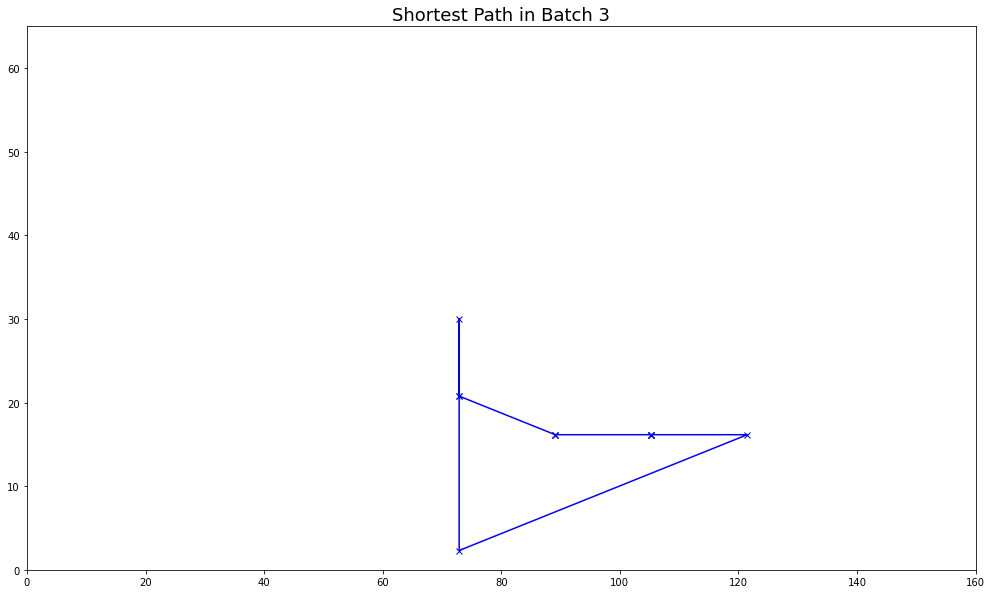

In [120]:
import matplotlib.pyplot as plt
plt.title("Shortest Path in Batch 3", size = 18)

plt.plot([array[tour[i%n]][0] for i in range (n+1) ], 
        [array[tour[i%n]][1] for i in range(n+1)],'xb-')

plt.xlim(0,160)
plt.ylim (0, 65)
plt.show()